In [ ]:
!pip install --upgrade google-cloud-bigquery

In [ ]:
from google.colab import auth
from google.cloud import bigquery
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
auth.authenticate_user()

In [ ]:
project_id = 'data-analytics-mate'
client = bigquery.Client(project=project_id)

In [ ]:
query = """
    SELECT
  ep.event_date as date,
  sp.ga_session_id,
  sp.continent,
  sp.country,
  sp.device,
  sp.browser,
  sp.mobile_model_name,
  sp.operating_system,
  sp.language,
  sp. medium,
  sp.channel,
  ac.id AS account_id,
  ac.is_unsubscribed,
  ac.is_verified,
  p.category,
  p.name,
  p.price,
  p.short_description
FROM
  `data-analytics-mate.DA.session_params` sp
JOIN
  `data-analytics-mate.DA.order` o
ON
  sp.ga_session_id = o.ga_session_id
JOIN
  `data-analytics-mate.DA.product` p
ON
  o.item_id = p.item_id
JOIN
  `data-analytics-mate.DA.event_params` ep
ON
  o.ga_session_id = ep.ga_session_id
LEFT JOIN
  `data-analytics-mate.DA.account_session` acs
ON
  acs.ga_session_id = sp.ga_session_id
LEFT JOIN
  `data-analytics-mate.DA.account` ac
ON
  acs.account_id = ac.id;
"""

df = client.query(query).to_dataframe()
df.head()

,date,ga_session_id,continent,country,device,browser,mobile_model_name,operating_system,language,medium,channel,account_id,is_unsubscribed,is_verified,category,name,price,short_description
0,20201226,2975280392,Americas,United States,desktop,Chrome,Safari,Web,en-us,referral,Paid Search,<NA>,<NA>,<NA>,Cabinets & cupboards,IDÅSEN,1345.0,"Cabinet with smart lock, 80x119 cm"
1,20201226,4595836498,Americas,United States,mobile,Safari,iPhone,iOS,None,<Other>,Paid Search,<NA>,<NA>,<NA>,Cabinets & cupboards,LIXHULT,841.0,"Storage combination, 130x117 cm"
2,20201226,8851762418,Americas,Canada,mobile,Chrome,<Other>,Web,en-us,(none),Direct,<NA>,<NA>,<NA>,Cabinets & cupboards,HÄLLAN,375.0,"Storage combination with doors, 45x47x92 cm"
3,20210101,2417563951,Africa,Algeria,desktop,Chrome,Chrome,Web,None,organic,Paid Search,669849,0,0,Bookcases & shelving units,OXBERG,200.0,"Glass door, 40x192 cm"
4,20210101,4900663939,Americas,United States,desktop,Chrome,Safari,Web,en-us,referral,Social Search,<NA>,<NA>,<NA>,Chairs,ÖRFJÄLL,225.0,Swivel chair


In [ ]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [ ]:
df.info()
print(f"Start : {df['date'].min()}, Finish : {df['date'].max()}") # Початок і кнець часового періоду
print(f"Count of distinct sessions :{df['ga_session_id'].nunique()}") # Кількість ункальних сесій

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410898 entries, 0 to 410897
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   date               410898 non-null  datetime64[ns]
 1   ga_session_id      410898 non-null  Int64         
 2   continent          410898 non-null  object        
 3   country            410898 non-null  object        
 4   device             410898 non-null  object        
 5   browser            410898 non-null  object        
 6   mobile_model_name  410898 non-null  object        
 7   operating_system   410898 non-null  object        
 8   language           233683 non-null  object        
 9   medium             410898 non-null  object        
 10  channel            410898 non-null  object        
 11  account_id         34379 non-null   Int64         
 12  is_unsubscribed    34379 non-null   Int64         
 13  is_verified        34379 non-null   Int64   

# Загальний аналіз отриманих даних

### 1. Загальна кількість колонок
- **18 колонок**

### 2. Кількість колонок числового типу (та які саме)
- **5 числових колонок:**
  - `ga_session_id`
  - `account_id`
  - `is_unsubscribed`
  - `is_verified`
  - `price`

### 3. Кількість колонок категоріального типу (та які саме)
- **12 колонок категоріального типу:**
  - `continent`
  - `country`
  - `device`
  - `browser`
  - `mobile_model_name`
  - `operating_system`
  - `language`
  - `medium`
  - `channel`
  - `category`
  - `name`
  - `short_description`

### 4. Кількість колонок типу datetime
- **1 колонка типу datetime:**
  - `date`

### 5. Кількість унікальних сесій
- **33,538 унікальних сесій**

### 6. Який період часу розглядається
- **Період часу:**
  - Від: `2020-11-01 00:00:00`
  - До: `2021-01-27 00:00:00`

### 7. Чи є пропущені значення
- Так, пропущені значення є.

### 8. В яких колонках більше пропущених значень, яка причина?
- **Колонка `language`:**
  - Пропущено **177,215 записів**.
  - Причина: Можливо, інформація про мову браузера не збиралася для певних сесій.
- **Колонки `account_id`, `is_unsubscribed`, `is_verified`:**
  - Пропущено **376,519 записів** у кожній.
  - Причина: Ці колонки заповнені лише для зареєстрованих користувачів, які становлять невелику частку всіх сесій.


In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.facecolor'] = 'black'
rcParams['lines.linewidth'] = 2
rcParams['lines.markersize'] = 8
rcParams['font.size'] = 14
rcParams['axes.labelsize'] = 16
rcParams['axes.titlesize'] = 18
rcParams['axes.facecolor'] = 'black'
rcParams['axes.edgecolor'] = '#F0F3BD'
rcParams['axes.labelcolor'] = '#C69F89'
rcParams['axes.grid'] = True
rcParams['grid.color'] = 'gray'
rcParams['grid.linestyle'] = '--'
rcParams['grid.linewidth'] = 0.5
rcParams['xtick.color'] = '#F0F3BD'
rcParams['ytick.color'] = '#F0F3BD'
rcParams['text.color'] = '#F0F3BD'
rcParams['patch.edgecolor'] = 'black'
rcParams['patch.linewidth'] = 1.5
rcParams['axes.prop_cycle'] = plt.cycler(color=['#D7F75B','#791E94', '#D19C1D', '#7D451B', '#472C1B', '#DE6449', '#407899', '#41D3BD', '#9BE564', '#FFFFF2'])

## на яких континентах (топ-3) та в яких країнах (топ-5) наша компанія має найбільші продажі? найбільшу кількість замовлень?


In [ ]:
top_continent = df.groupby('continent')['price'].sum().sort_values(ascending=False).reset_index()
top_continent.head(3)

,continent,price
0,Americas,220147475.4
1,Asia,91716874.3
2,Europe,71758111.9


In [ ]:
top_country = df.groupby('country')['price'].sum().sort_values(ascending=False).reset_index()
top_country.head(5)

,country,price
0,United States,170959033.5
1,India,35598985.2
2,Canada,35016737.2
3,United Kingdom,12881324.2
4,France,9234427.9


 Отже найбільше прибутків компанії принесли    
* Контенети: Північна та Південна Америки, Азія та Європа.
* Країни: США, Індія, Канада, Сполучене королівсто, Франція

In [ ]:
top_continent_orders = df.groupby('continent')['name'].count().sort_values(ascending=False).reset_index()
top_continent_orders.head(3)

,continent,name
0,Americas,229479
1,Asia,94232
2,Europe,77588


In [ ]:
top_country_orders = df.groupby('country')['name'].count().sort_values(ascending=False).reset_index()
top_country_orders.head()

,country,name
0,United States,180732
1,India,35957
2,Canada,33448
3,United Kingdom,14099
4,Spain,8724


Найбільше замовлень    
* Континенти: Північна та південна Америки, Азія та Європа
* Країни: США, Індія, Канада, Сполучене Королівство, Іспанія


##знайди топ-10 категорій товарів за загальною сумою продажів

In [ ]:
top_10_categories = df.groupby('category')['price'].sum().sort_values(ascending=False).reset_index()
top_10_categories.head(10)

,category,price
0,Sofas & armchairs,102676488.5
1,Chairs,72591496.6
2,Beds,62373822.5
3,Bookcases & shelving units,45909170.5
4,Outdoor furniture,28921971.6
5,Cabinets & cupboards,28677435.0
6,Tables & desks,22342175.5
7,Chests of drawers & drawer units,10483299.5
8,Bar furniture,9741620.0
9,Children's furniture,5660571.0


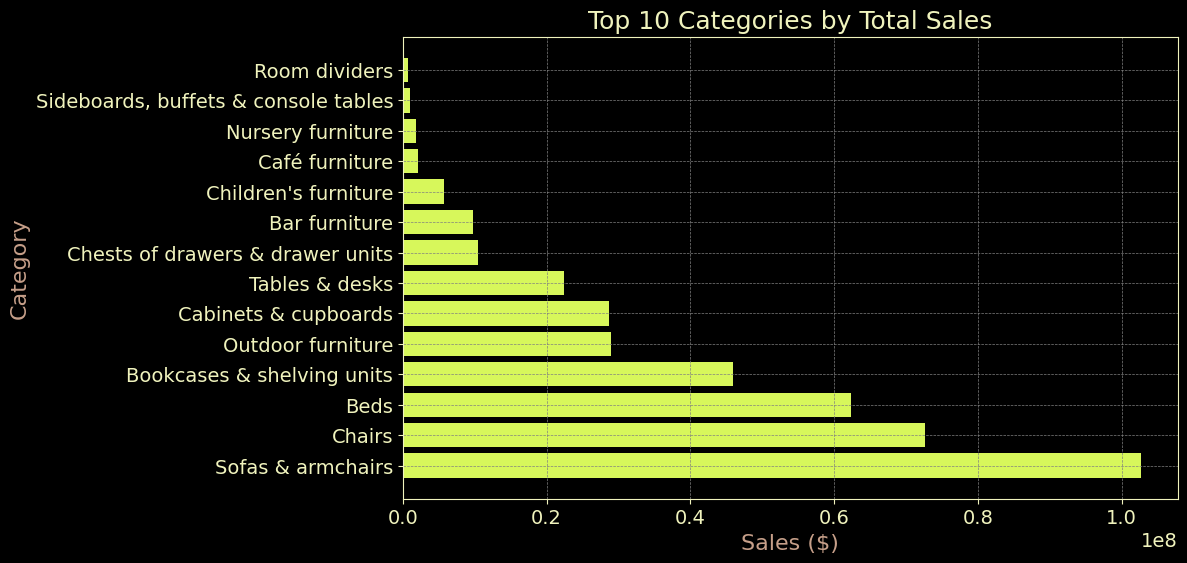

In [ ]:
plt.barh(top_10_categories['category'], top_10_categories['price'])
plt.title('Top 10 Categories by Total Sales')
plt.xlabel("Sales ($)")
plt.ylabel('Category')
plt.show()

##знайди топ-10 категорій товарів у країні з найбільшими продажами, чи відрізняється ситуація від загальної?

In [ ]:
top_categories_us = df[df['country'] == 'United States'].groupby('category')['price'].sum().sort_values(ascending=False).reset_index()
top_categories_us.head(10)

,category,price
0,Sofas & armchairs,41224108.5
1,Chairs,30716783.6
2,Beds,30338834.0
3,Bookcases & shelving units,20746297.4
4,Outdoor furniture,12264326.0
5,Cabinets & cupboards,12255698.5
6,Tables & desks,9648891.0
7,Bar furniture,4657022.0
8,Chests of drawers & drawer units,4116102.5
9,Children's furniture,2702242.0


Різниця в категоріях по загалу та в країні з найбільшими продажами (США) тільки в рейтингу 'Bar furniture' в США він на одну позицію вище. Верхівка рейтингу виглядає так само.

##проаналізуй продажі у розрізі типів та моделей девайсів (у % від загальних продажів)

In [ ]:
sales_dy_device = df.groupby('device')['price'].sum().sort_values(ascending=False).reset_index()
sales_dy_device['total'] = sales_dy_device['price'].sum()
sales_dy_device['percent_from_total_(%)'] = sales_dy_device['price'] / sales_dy_device['total'] * 100
print(sales_dy_device)

    device        price        total  percent_from_total_(%)
0  desktop  238449381.5  394839361.7               60.391492
1   mobile  147361485.2  394839361.7               37.321883
2   tablet    9028495.0  394839361.7                2.286625


Отже розподіл прибутків по девайсах виглядає наступним чином:
* Десктоп - 60,4%
* Мобайл - 37,3%
* Планшет - 2,3%


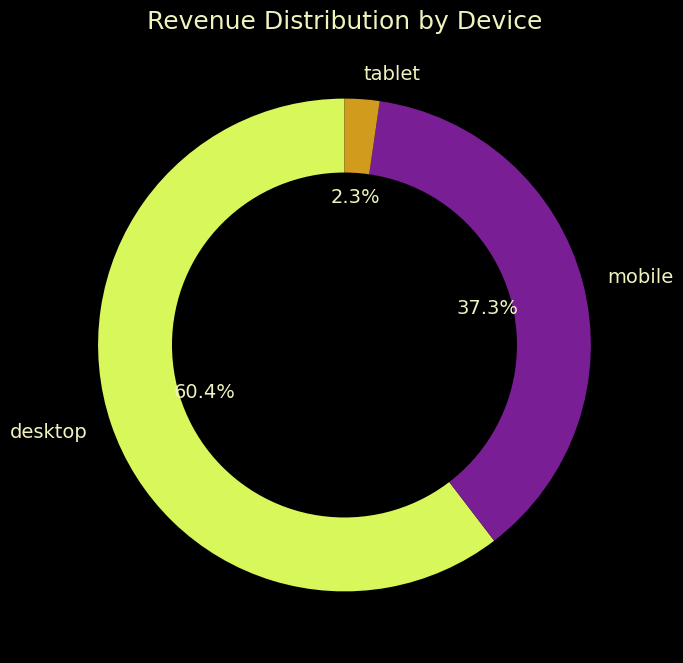

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(sales_dy_device['price'], labels=sales_dy_device['device'], autopct='%1.1f%%', startangle=90)
centre_circle = plt.Circle((0, 0), 0.70, fc='black')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Revenue Distribution by Device')
plt.show()

проаналізуй продажі за джерелами трафіку (у % від загальних продажів)

In [ ]:
sales_dy_channel = df.groupby('channel')['price'].sum().sort_values(ascending=False).reset_index()
sales_dy_channel['total'] = sales_dy_channel['price'].sum()
sales_dy_channel['percent_from_total_(%)'] = sales_dy_channel['price'] / sales_dy_channel['total'] * 100
print(sales_dy_channel)

          channel        price        total  percent_from_total_(%)
0  Organic Search  145913683.0  394839361.7               36.955202
1     Paid Search  101849798.5  394839361.7               25.795250
2          Direct   91859462.4  394839361.7               23.265022
3   Social Search   29745498.3  394839361.7                7.533570
4       Undefined   25470919.5  394839361.7                6.450958


Отже розподіл прибутків по канал виглядає наступним чином:    
* Organic Search - 37%
* Paid Search - 25.8%
* Direct - 23.3%
* Social Search - 7.5%
* Undefined - 6.5%

##який відсоток зареєстрованих користувачів підтвердив свою електронну адресу?

In [ ]:
registered_users = df['account_id'].notnull().count()
verified_users = df['is_verified'].sum()
percetnt_verified = (verified_users / registered_users) * 100
print(f" Percent of verified users : {percetnt_verified}(%)")

 Percent of verified users : 6.045539282254964(%)


Близько 6% зареєстрованих користувачів підтвердили свою електронну адресу.

##який відсоток зареєстрованих користувачів відписався від розсилки?

In [ ]:
unsubscribed_users = df['is_unsubscribed'].sum()
percetnt_unsubscribed = (unsubscribed_users / registered_users) * 100
print(f" Percent of nsubscribed users : {percetnt_unsubscribed}(%)")

 Percent of nsubscribed users : 1.4777390009199363(%)


Близько 1,47% зареєстрованих користувачів відписалися від розсилки

##чи відрізняється поведінка (у плані продажів) тих, хто відписався від розсилки та тих, хто досі підписаний?

In [ ]:
sales_by_subscribe = df.groupby('is_unsubscribed').agg(
                                                       total_sales=('price', 'sum'),
                                                       total_orders=('name', 'count'),
                                                      ).assign(
                                                               average_order_price=lambda x:
                                                               x['total_sales'] / x['total_orders']
                                                               ).reset_index()
print(sales_by_subscribe)

   is_unsubscribed  total_sales  total_orders  average_order_price
0                0   27058731.0         28307           955.902462
1                1    5175344.6          6072           852.329480


Середня сума замовлення для підписаних користувачів дещо більша ніж для тих, хто відписався.

##в яких країнах найбільше зареєстрованих користувачів?

In [ ]:
registered_users_data = df[df['account_id'].notnull()]

In [ ]:
countries_registered_users = registered_users_data.groupby('country')['account_id'].count().sort_values(ascending=False).reset_index()
countries_registered_users.head()

,country,account_id
0,United States,14332
1,India,3650
2,Canada,2478
3,United Kingdom,1319
4,Taiwan,1025


#Аналіз динаміки продажів    
##знайди загальні продажі за кожну дату, створи візуалізацію загальної динаміки продажів


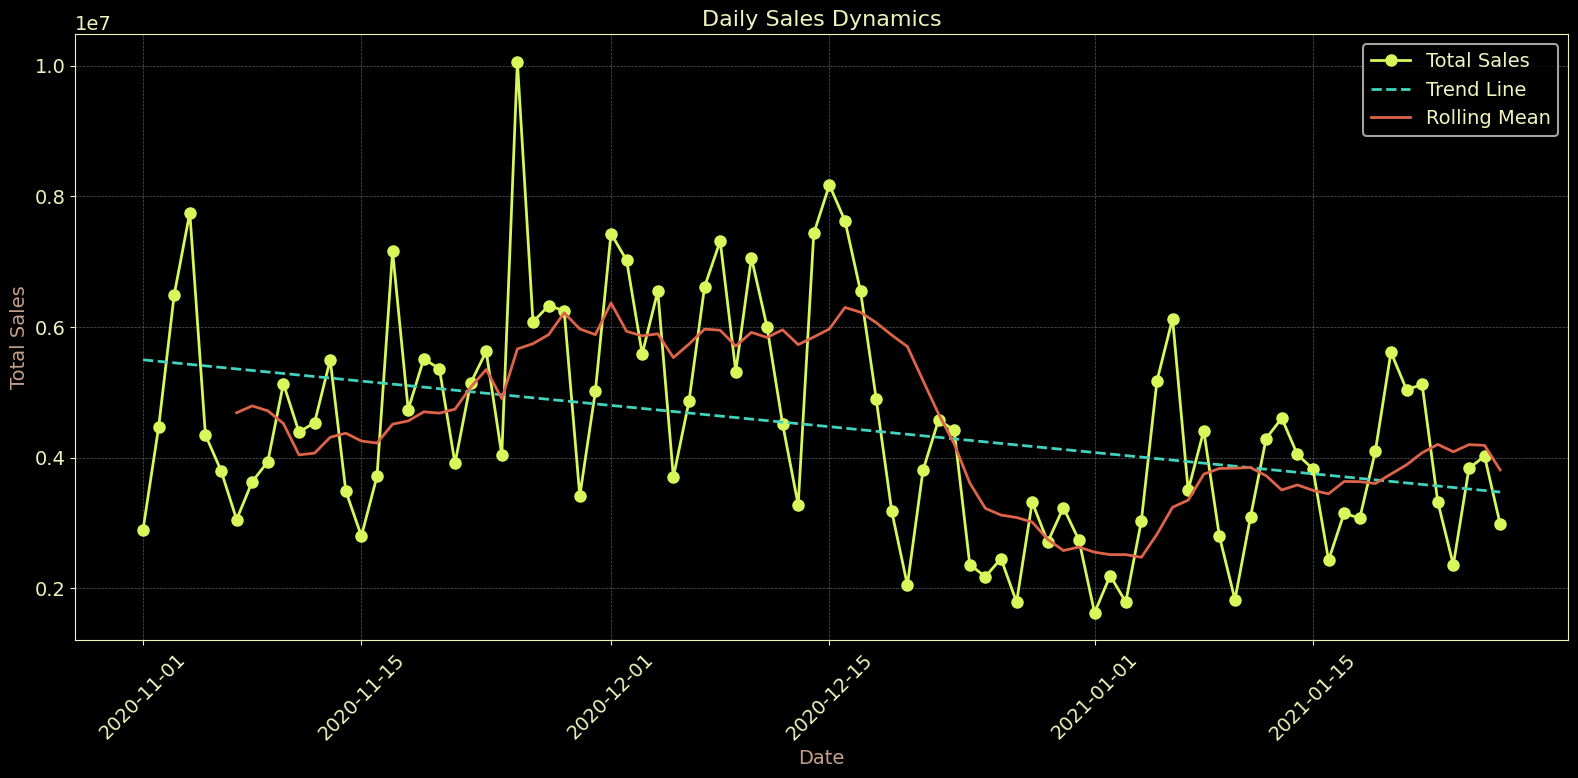

In [ ]:
sales_by_day = df.groupby('date')['price'].sum().reset_index()
sales_by_day['7_days_avg'] = sales_by_day['price'].rolling(window=7).mean()


plt.figure(figsize=(16, 8))

# розрахунок лінійної регресї
x = np.arange(len(sales_by_day['date']))
y = sales_by_day['price']

z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# Лінійний графік
plt.plot(sales_by_day['date'], sales_by_day['price'], marker='o', linestyle='-', label='Total Sales')

# Ліня тренду
plt.plot(sales_by_day['date'], p(x), color='#41D3BD', linestyle='--', label='Trend Line')

plt.plot(sales_by_day['date'], sales_by_day['7_days_avg'], color='#DE6449', linestyle='-', label='Rolling Mean')
# Додавання підписів і легенди
plt.title('Daily Sales Dynamics', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=45)  # Повертаємо підписи на осі X для зручності читання
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

plt.tight_layout()
plt.show()


Бачимо значні коливання продажів протягом досліджуваного періоду. Низсхідна лінія тренду говорить, що продажі на кінець періоду знизились.


##чи спостерігається сезонність продажів?

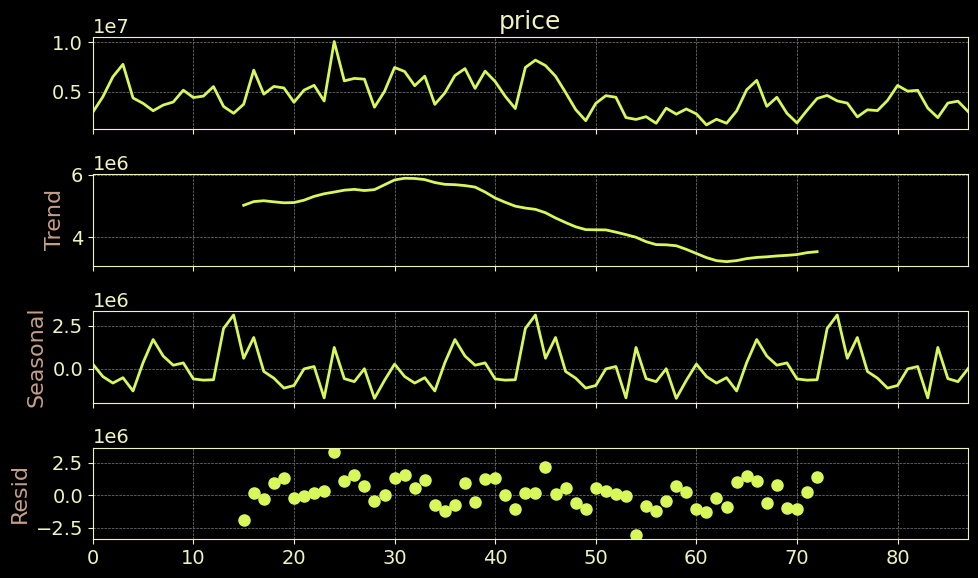

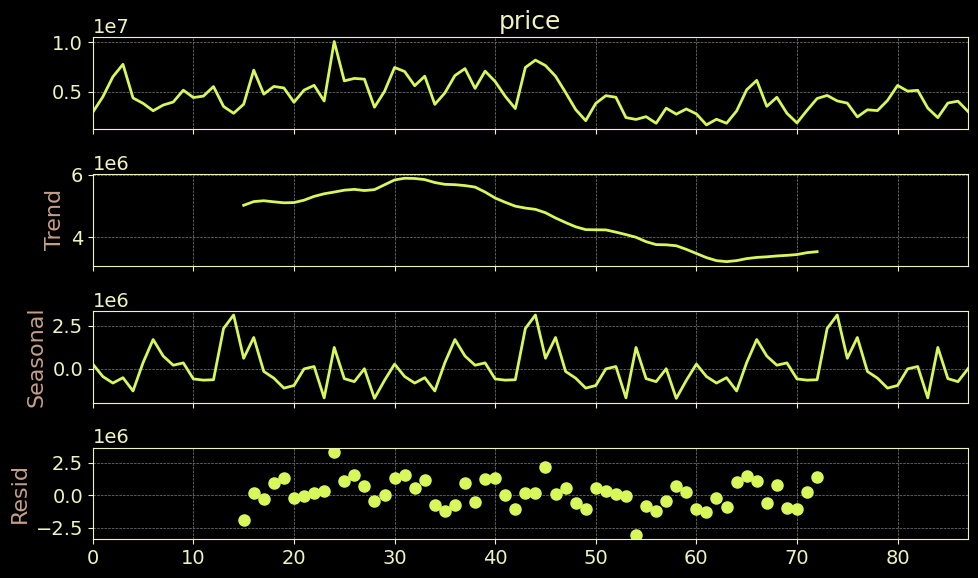

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(sales_by_day['price'], model='additive', period=30)
result.plot()


*Тренд:*

Протягом трьох місяців є чітке зниження продажів. Можливо, це пов'язано із закінченням святкового періоду (грудень), коли зазвичай продажі зростають
   
   *Сезонна компонента:*    


Видно певні коливання, які повторюються, але вони не мають чіткої структури.

*Залишки (Residual):*

Залишки виглядають досить рівномірно розподіленими, що означає, що тренд і сезонна компонента добре пояснюють ваші дані.


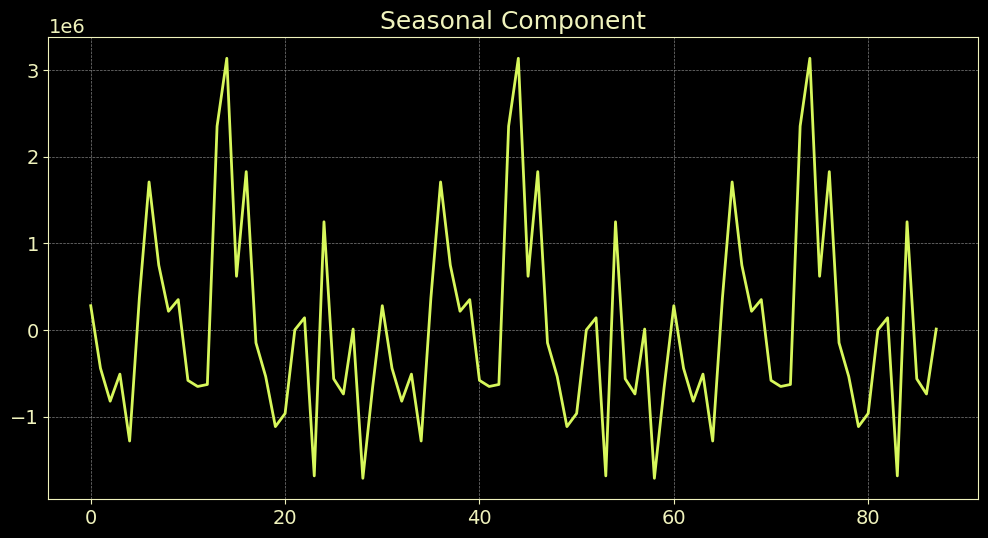

In [ ]:
result.seasonal.plot(figsize=(12, 6))
plt.title('Seasonal Component')
plt.show()

Видно повторювані піки приблизно кожні 7-10днів, що може свідчити про наявність тижневої сезонності.

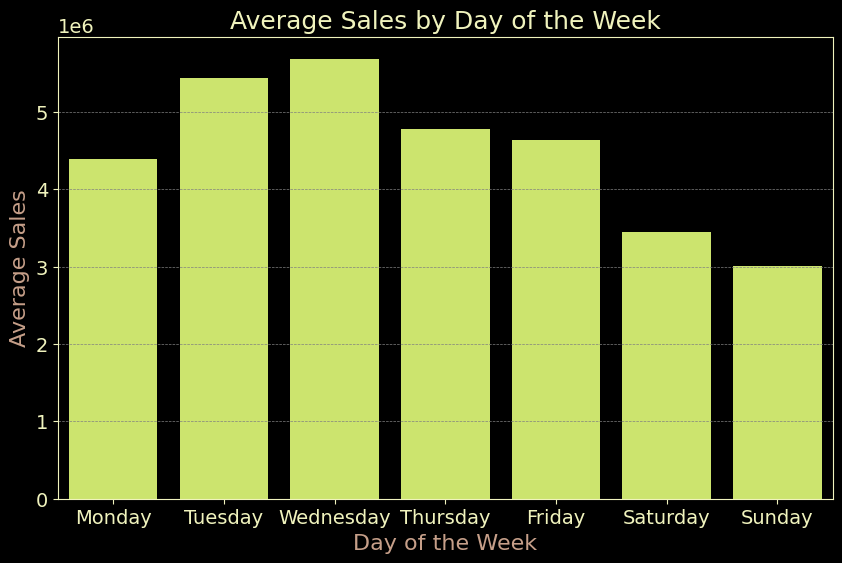

In [ ]:
sales_by_day['day_of_week'] = sales_by_day['date'].dt.day_name()
weekly_sales = sales_by_day.groupby('day_of_week')['price'].mean().reindex(
                                      ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
                                      )

sns.barplot(x=weekly_sales.index, y=weekly_sales.values)
plt.title('Average Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Sales')
plt.show()




Графік підтверджує наявність тижневої сезонності. Найвищі продажі припадають на середину тижня (вівторок і середа), а найнижчі — на вихідні (субота і неділя). Це може допомогти у плануванні маркетингових кампаній і стратегій продажів.



##проаналізуй динаміку продажів в Америці, Азії та Європі, відображай різні континенти різними кольорами

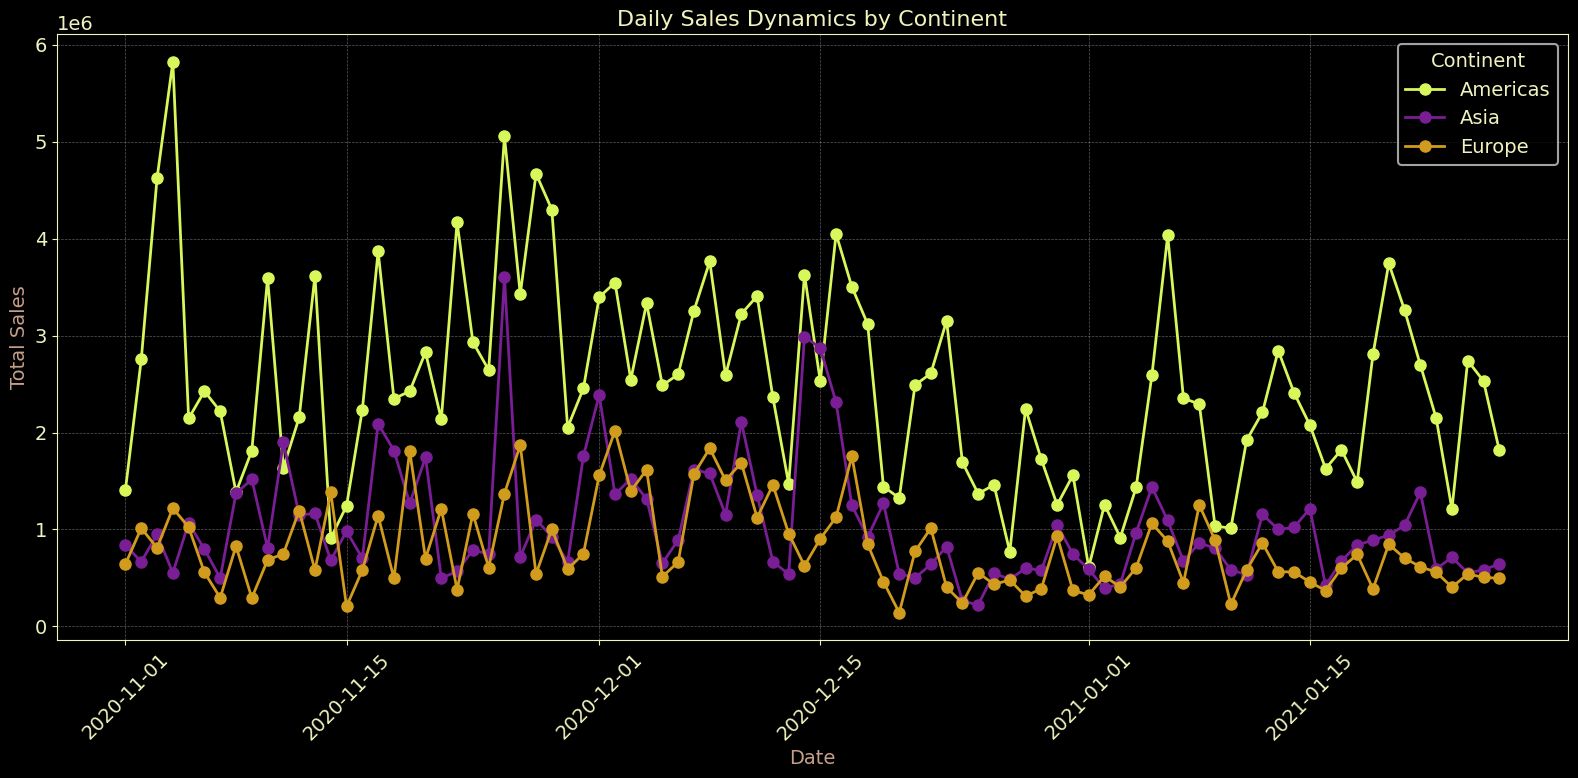

In [ ]:
# Групування даних за датою та континентом
sales_by_continent = df.groupby(['date', 'continent'])['price'].sum().reset_index()
sales_by_continent_1 = sales_by_continent[sales_by_continent['continent'].isin(['Americas', 'Asia', 'Europe'])].reset_index()
# Побудова графіка
plt.figure(figsize=(16, 8))

# Створення лінійного графіка для кожного континенту
for continent in ['Americas', 'Asia', 'Europe']:
    continent_data = sales_by_continent_1[sales_by_continent_1['continent'] == continent].reset_index()
    plt.plot(
        continent_data['date'],
        continent_data['price'],
        marker='o',
        linestyle='-',
        label=continent
    )

# Додавання підписів і легенди
plt.title('Daily Sales Dynamics by Continent', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=45)  # Повертаємо підписи на осі X для зручності читання
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Continent')

plt.tight_layout()
plt.show()


*Америки*    
мають найвищий рівень продажів серед трьох континентів:
Протягом усього періоду вони демонструють значно вищу динаміку продажів порівняно з Азією та Європою.
Помітні сплески у листопаді та грудні, ймовірно, пов’язані зі святковим сезоном (наприклад, Чорна п’ятниця чи Різдво).    
*Азія*    
займає друге місце за рівнем продажів: Продажі мають стабільніший характер із меншими коливаннями порівняно з Америками.
Є невеликий сплеск у середині грудня, можливо, пов'язаний із локальними подіями чи святами.    
*Європа*    
демонструє найнижчий рівень продажів: Продажі відносно стабільні, але на низькому рівні, без значних сплесків.
Вказує на те, що цей регіон, можливо, потребує додаткових маркетингових зусиль.
    
*Загальний тренд*

У грудні видно загальний підйом продажів, ймовірно, через святковий сезон.
Після грудня (початок січня) помітно зниження динаміки продажів на всіх континентах.

##проаналізуй динаміку продажів у розрізі каналів трафіку, відображай різні канали різними кольорами

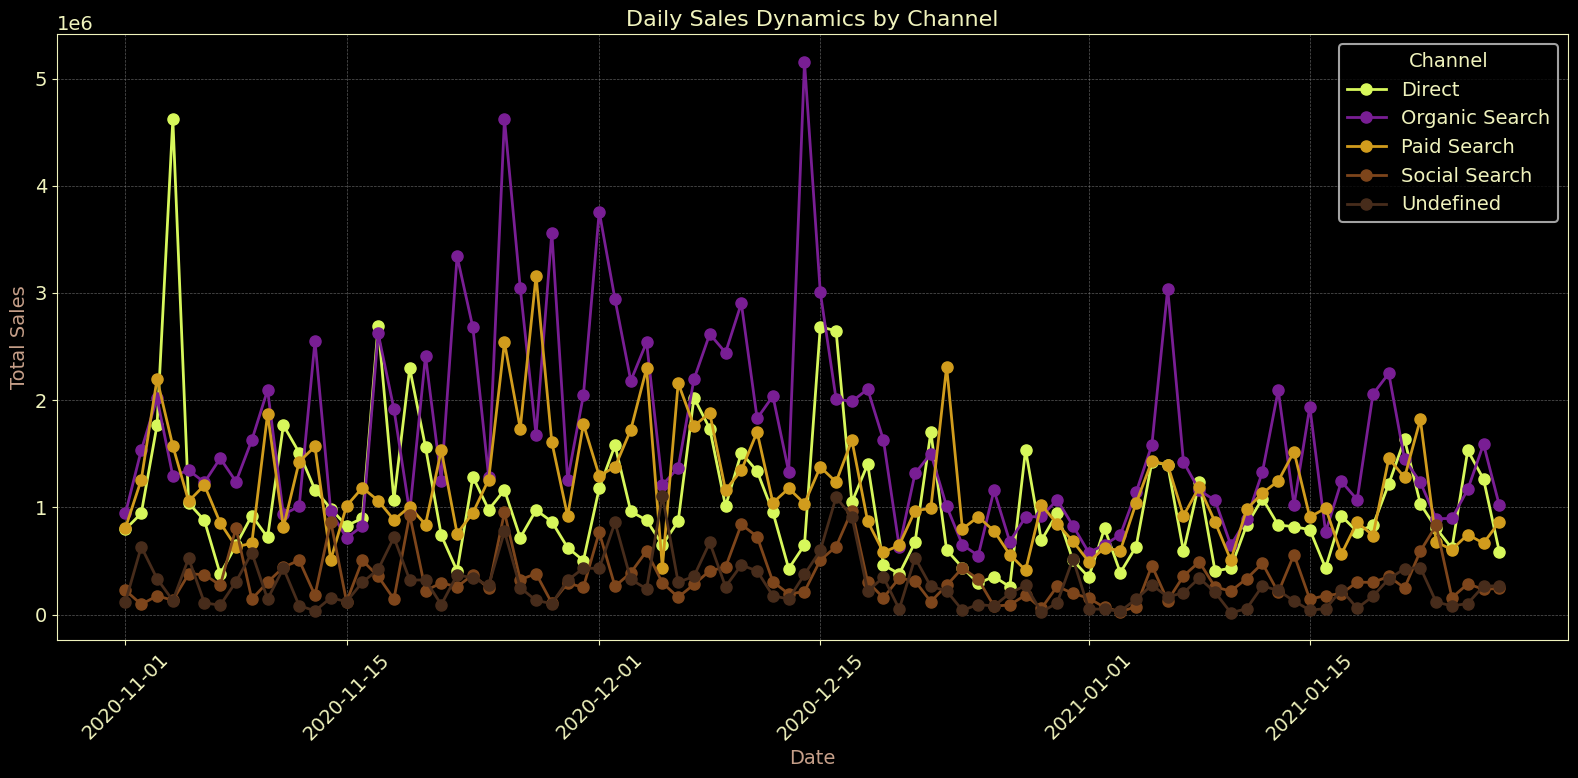

In [ ]:
# Групування даних за датою та каналом
sales_by_channel = df.groupby(['date', 'channel'])['price'].sum().reset_index()

# Побудова графіка
plt.figure(figsize=(16, 8))

# Створення лінійного графіка для кожного каналу
for channel in sales_by_channel['channel'].unique():
    channel_data = sales_by_channel[sales_by_channel['channel'] == channel].reset_index()
    plt.plot(
        channel_data['date'],
        channel_data['price'],
        marker='o',
        linestyle='-',
        label=channel
    )

# Додавання підписів і легенди
plt.title('Daily Sales Dynamics by Channel', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=45)  # Повертаємо підписи на осі X для зручності читання
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Channel')

plt.tight_layout()
plt.show()

Лідери серед каналів:    
*Organic Search (фіолетова лінія)* є найбільш продуктивним каналом, показуючи найвищі продажі протягом усього періоду. Помітні піки у листопаді та грудні, можливо, через святковий сезон.    
*Direct (жовта лінія)* стабільно тримається на другому місці, демонструючи рівніший розподіл продажів.    
Менш ефективні канали:    
*Paid Search (помаранчева лінія)* займає середню позицію, демонструючи помірні продажі.    
*Social Search і Undefined (коричневі лінії)* мають найнижчі продажі, із майже незмінним рівнем протягом усього періоду.
Динаміка:    
У грудні спостерігається різкий підйом продажів у всіх каналах, ймовірно, пов’язаний зі святковими подіями.
У січні продажі поступово знижуються, що є типовим післясвятковим трендом.

##проаналізуй динаміку продажів у розрізі типів девайсів, відображай різні девайси різними кольорами

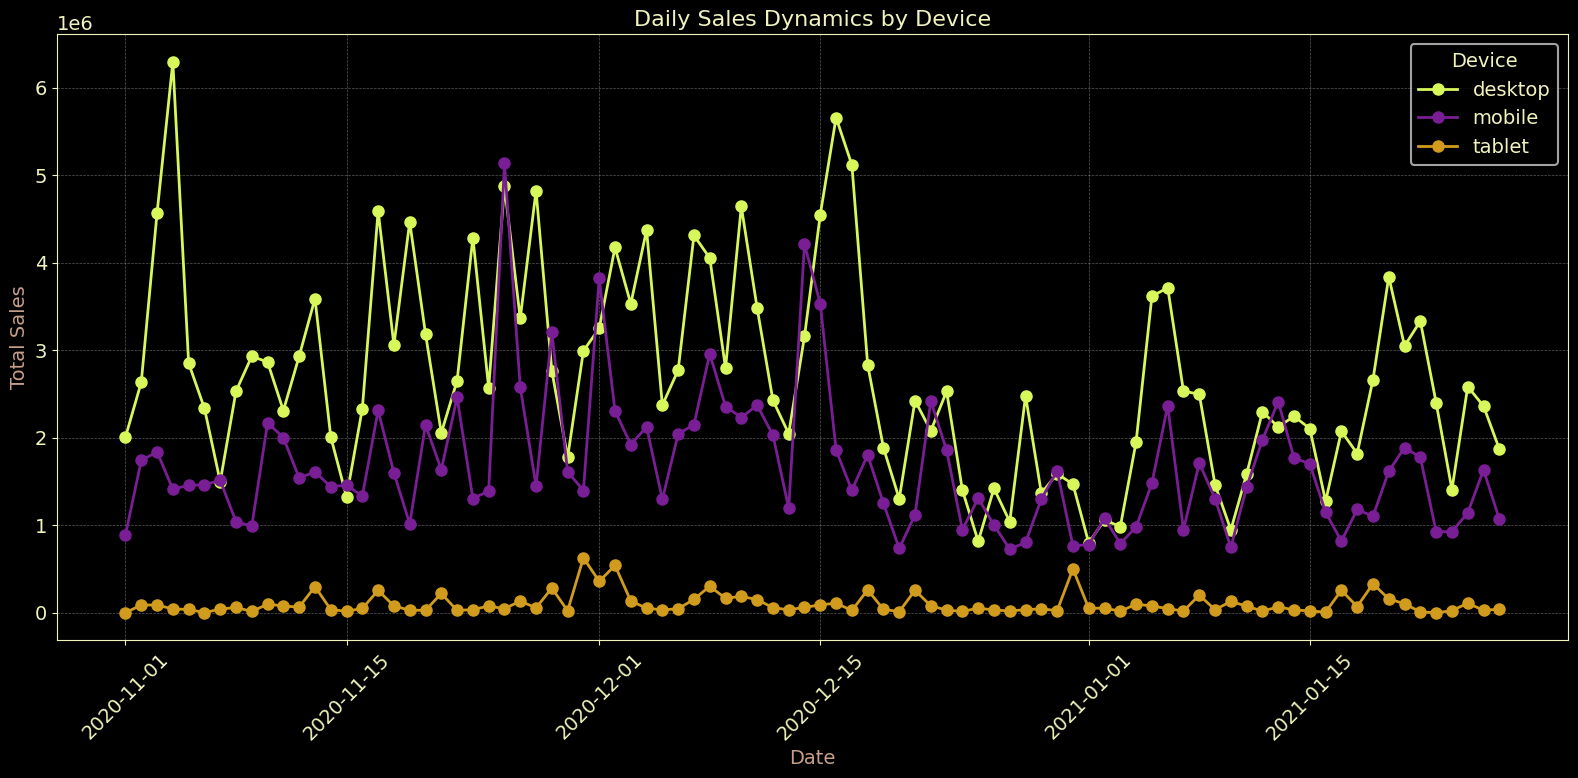

In [ ]:
# Групування даних за датою та device
sales_by_device = df.groupby(['date', 'device'])['price'].sum().reset_index()

# Побудова графіка
plt.figure(figsize=(16, 8))

# Створення лінійного графіка для кожного device
for device in sales_by_device['device'].unique():
    device_data = sales_by_device[sales_by_device['device'] == device].reset_index()
    plt.plot(
        device_data['date'],
        device_data['price'],
        marker='o',
        linestyle='-',
        label=device
    )

# Додавання підписів і легенди
plt.title('Daily Sales Dynamics by Device', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(rotation=45)  # Повертаємо підписи на осі X для зручності читання
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Device')

plt.tight_layout()
plt.show()

# Висновок: Динаміка продажів за типом пристрою

1. **Домінуючий пристрій:**
   - **Desktop** має найвищий рівень продажів протягом усього періоду.
   - Значні сплески продажів на Desktop спостерігаються у святковий сезон (листопад-грудень), що свідчить про перевагу цього пристрою для покупок.

2. **Mobile:**
   - **Mobile** посідає друге місце за рівнем продажів.
   - Продажі стабільно нижчі за Desktop, але також демонструють зростання у святковий період (грудень).

3. **Tablet:**
   - **Tablet** має найнижчий рівень продажів серед усіх пристроїв.
   - Продажі залишаються майже незмінними протягом усього періоду, без значних сплесків.

4. **Загальна тенденція:**
   - Усі пристрої демонструють піки у святковий сезон (грудень), після чого спостерігається поступове зниження в січні.
   - Desktop і Mobile залишаються основними пристроями для здійснення покупок

# Висновок за результатами аналізу динаміки продажів

### 1. **Динаміка продажів за континентами:**
- **Америки** лідирують за продажами, демонструючи найвищі сплески, особливо в період святкового сезону (листопад-грудень).
- **Азія** стабільно займає друге місце, із більш рівномірною динамікою продажів.
- **Європа** має найнижчий рівень продажів і практично не демонструє суттєвих піків.

### 2. **Динаміка продажів за каналами:**
- **Organic Search** є провідним каналом, забезпечуючи найбільший обсяг продажів.
- **Direct** займає другу позицію, демонструючи стабільність протягом усього періоду.
- Інші канали, такі як **Paid Search** та **Social Search**, мають значно менший внесок у продажі.

### 3. **Динаміка продажів за типом пристрою:**
- **Desktop** є домінуючим пристроєм для покупок, із найвищими піками під час свят.
- **Mobile** демонструє менші, але стабільні продажі, займаючи другу позицію.
- **Tablet** має найнижчий рівень продажів, майже без змін протягом усього періоду.

### 4. **Загальні тенденції:**
- У святковий сезон (листопад-грудень) спостерігається значне зростання продажів для всіх категорій (континентів, каналів, пристроїв).
- Починаючи з січня, загальна динаміка продажів поступово знижується, що є типовим післясвятковим трендом.

---

## Рекомендації:
1. **Америки та Desktop** слід розглядати як ключові ринки та пристрої для фокусування маркетингових кампаній.
2. Оптимізувати сайти та стратегії для **Mobile**, щоб збільшити частку цього пристрою.
3. Зосередитись на посиленні **Organic Search** як основного каналу залучення клієнтів.
4. Використовувати отримані інсайти для розробки спеціальних кампаній у святковий період, орієнтуючись на регіони та пристрої з найвищим потенціалом продажів.


#Зведені таблиці.
##створи зведену таблицю, яка показує кількість сесій у розрізі каналів трафіку та типів девайсів (якщо значення якогось поля невідоме, його не враховуй)

In [ ]:
print(df['device'].unique())

['desktop' 'mobile' 'tablet']


In [ ]:
print(df['channel'].unique())

['Paid Search' 'Direct' 'Social Search' 'Organic Search' 'Undefined']


In [ ]:
filtered_data = df[df['channel'] != 'Undefined']

In [ ]:
sessions_by_channel_device = pd.pivot_table(filtered_data, values='ga_session_id', index=['channel','device'], aggfunc='nunique').reset_index()
#print(sessions_by_channel_device.columns)
sessions_by_channel_device = sessions_by_channel_device.rename(columns={'ga_session_id': 'session_cnt'})
print(sessions_by_channel_device)

           channel   device  session_cnt
0           Direct  desktop         4655
1           Direct   mobile         2985
2           Direct   tablet          160
3   Organic Search  desktop         7011
4   Organic Search   mobile         4655
5   Organic Search   tablet          255
6      Paid Search  desktop         5261
7      Paid Search   mobile         3574
8      Paid Search   tablet          207
9    Social Search  desktop         1594
10   Social Search   mobile         1065
11   Social Search   tablet           57


##створи зведену таблицю, яка показує загальні продажі за категоріями товарів (топ-10 категорій) у різних країнах (топ-5 країн)

In [ ]:
top_categories = (
    df.groupby('category')['price'].sum()
    .nlargest(10)  # Вибираємо  категорії з найбільшими продажами
    .index
)
#print(top_categories)

top_countries = (
    df.groupby('country')['price'].sum()
    .nlargest(5)  # Вибираємо країни з найбільшими продажами
    .index
)
#print(top_countries)

filter_top_data = df[df['category'].isin(top_categories) & df['country'].isin(top_countries)] # Залишаємо лише дані з топ країн

sales_top10_cat = pd.pivot_table(filter_top_data, values='price', index=['category','country'], aggfunc='sum').reset_index()
sales_top10_cat = sales_top10_cat.rename(columns={'price': 'total_sales'})
print(sales_top10_cat)

                            category         country  total_sales
0                      Bar furniture          Canada    1209465.0
1                      Bar furniture          France      99999.0
2                      Bar furniture           India     671624.0
3                      Bar furniture  United Kingdom     240129.0
4                      Bar furniture   United States    4657022.0
5                               Beds          Canada    8049821.0
6                               Beds          France     931516.0
7                               Beds           India    3349946.5
8                               Beds  United Kingdom    2191192.0
9                               Beds   United States   30338834.0
10        Bookcases & shelving units          Canada    2935686.0
11        Bookcases & shelving units          France     548530.0
12        Bookcases & shelving units           India    4147626.5
13        Bookcases & shelving units  United Kingdom    1503404.5
14        

##Побудувати зведену таблицю, яка дасть змогу побачити середню кількість сесій та середню ціну замовлень для кожного каналу та пристрою

In [ ]:
avg_sessions_price = pd.pivot_table(
    df,
    values=['ga_session_id', 'price'],
    index=['channel', 'device'],
    aggfunc={'ga_session_id' : 'nunique',
             'price' : 'mean'}
).reset_index()

avg_sessions_price = avg_sessions_price.rename(columns={
    'ga_session_id' : 'avg_sessions',
    'price' : 'avg_order_price'
})
print(avg_sessions_price)

           channel   device  avg_sessions  avg_order_price
0           Direct  desktop          4655      1003.767183
1           Direct   mobile          2985       918.284993
2           Direct   tablet           160       815.049965
3   Organic Search  desktop          7011       987.711037
4   Organic Search   mobile          4655      1083.618764
5   Organic Search   tablet           255       696.803183
6      Paid Search  desktop          5261       931.870821
7      Paid Search   mobile          3574       912.721801
8      Paid Search   tablet           207      1012.047100
9    Social Search  desktop          1594       826.698904
10   Social Search   mobile          1065       862.446424
11   Social Search   tablet            57      1198.770487
12       Undefined  desktop          1181       977.985485
13       Undefined   mobile           834       809.718753
14       Undefined   tablet            44      2689.449618


#Статистичний аналіз взаємозв’язків.
##Знайди кількість сесій та загальні продажі за кожну дату. Створи візуалізацію, щоб побачити взаємозв’язок між цими метриками. Чи корелюють ці показники? Знайди відповідний коефіцієнт кореляції та проаналізуй його статистичну значущість.


In [ ]:
from scipy.stats import pearsonr
from scipy.stats import shapiro
from scipy.stats import ttest_ind, mannwhitneyu
from scipy.stats import kruskal


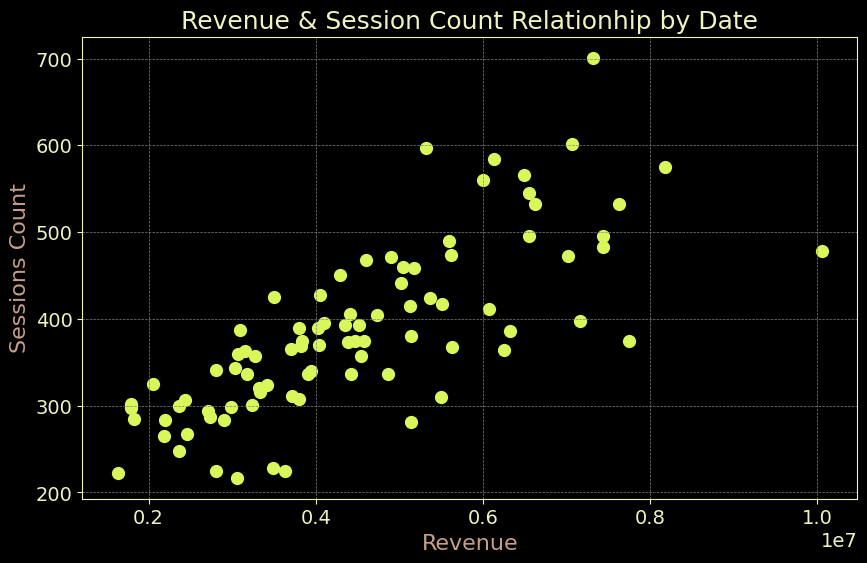

In [ ]:
sales_dy_sessions = pd.pivot_table(
    df,
    values=['ga_session_id', 'price'],
    index=['date'],
    aggfunc={'ga_session_id' : 'nunique',
             'price' : 'sum'}
).reset_index()

sales_dy_sessions = sales_dy_sessions.rename(columns={
    'ga_session_id' : 'sessions',
    'price' : 'revenue'
})
#print(sales_dy_sessions)
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(sales_dy_sessions['revenue'], sales_dy_sessions['sessions'])
ax.set_title('Revenue & Session Count Relationhip by Date')
ax.set_xlabel('Revenue')
ax.set_ylabel('Sessions Count')

plt.show()

In [ ]:
# Вибираємо змінні
x = sales_dy_sessions['revenue']
y = sales_dy_sessions['sessions']

# Розрахунок коефіцієнта кореляції та p-value
correlation, p_value = pearsonr(x, y)

# Вивід результатів
print(f"Pearson correlation coefficient: {correlation:.2f}")
print(f"P-value: {p_value:.4f}")

Pearson correlation coefficient: 0.76
P-value: 0.0000


## Висновок

1. **Коефіцієнт кореляції (Pearson):**
   - Значення **0.76** вказує на сильну позитивну кореляцію між кількістю сесій (`sessions`) і доходом (`revenue`).
   - Це означає, що збільшення кількості сесій зазвичай призводить до зростання доходу.

2. **Статистична значущість:**
   - **P-value: 0.0000** свідчить про те, що кореляція є статистично значущою.
   - Ми можемо з високою впевненістю сказати, що залежність між цими змінними не є випадковою.

3. **Практичне значення:**
   - Результати показують важливість залучення більшої кількості сесій для збільшення доходу.
   - Це може бути основою для розробки стратегії залучення нових користувачів або підвищення активності існуючих.

---


#Чи корелюють між собою продажі на різних континентах? Візьми топ-3 континенти. Проаналізуй статистичну значущість взаємозв’язків.

In [ ]:
top_continents = (
    df.groupby('continent')['price'].sum()
    .nlargest(3)  # Вибираємо 3 континенти з найбільшими продажами
    .index
)
filter_continet_data = df[df['continent'].isin(top_continents)]
continent_data =  pd.pivot_table(
    filter_continet_data,
    values=['price'],
    index=['date', 'continent'],
    aggfunc= 'sum'
).reset_index()

continent_data = continent_data.rename(columns={
    'price' : 'revenue'
})
data_pivot = continent_data.pivot(index='date', columns='continent', values='revenue')

# Кореляційна матриця
correlation_matrix = data_pivot.corr()

print("Correlation Matrix:")
print(correlation_matrix)

continents = data_pivot.columns
for i in range(len(continents)):
    for j in range(i + 1, len(continents)):
        x = data_pivot[continents[i]]
        y = data_pivot[continents[j]]
        correlation, p_value = pearsonr(x, y)

        print(f"Correlation between {continents[i]} and {continents[j]}: {correlation:.2f}, P-value: {p_value:.4f}")

Correlation Matrix:
continent  Americas      Asia    Europe
continent                              
Americas   1.000000  0.419555  0.433700
Asia       0.419555  1.000000  0.390702
Europe     0.433700  0.390702  1.000000
Correlation between Americas and Asia: 0.42, P-value: 0.0000
Correlation between Americas and Europe: 0.43, P-value: 0.0000
Correlation between Asia and Europe: 0.39, P-value: 0.0002


## Висновок

### 1. **Кореляція між континентами:**
- **Americas і Asia:** Кореляція **0.42**, P-value **0.0000**.
- **Americas і Europe:** Кореляція **0.43**, P-value **0.0000**.
- **Asia і Europe:** Кореляція **0.39**, P-value **0.0002**.

### 2. **Значущість кореляції:**
- Усі коефіцієнти кореляції є **статистично значущими** (P-value < 0.05), що вказує на те, що взаємозв’язок між продажами на континентах не є випадковим.

### 3. **Інтерпретація:**
- **Середня кореляція:** Значення коефіцієнтів кореляції (0.39–0.43) свідчать про **помірний позитивний зв'язок** між продажами на континентах.
- Зростання продажів на одному континенті частково супроводжується зростанням на інших, що може бути пов’язано з глобальними факторами, наприклад, святами чи сезонними трендами.


#Чи корелюють між собою продажі за різними каналами трафіку? Проаналізуй статистичну значущість взаємозв’язків.

In [ ]:
channel_data =  pd.pivot_table(
    df,
    values=['price'],
    index=['date', 'channel'],
    aggfunc= 'sum'
).reset_index()

channel_data = channel_data.rename(columns={
    'price' : 'revenue'
})
data_pivot = channel_data.pivot(index='date', columns='channel', values='revenue')

# Кореляційна матриця
correlation_matrix = data_pivot.corr()

print("Correlation Matrix:")
print(correlation_matrix)

channels = data_pivot.columns
for i in range(len(channels)):
    for j in range(i + 1, len(channels)):
        x = data_pivot[channels[i]]
        y = data_pivot[channels[j]]
        correlation, p_value = pearsonr(x, y)

        print(f"Correlation between {channels[i]} and {channels[j]}: {correlation:.2f}, P-value: {p_value:.4f}")

Correlation Matrix:
channel           Direct  Organic Search  Paid Search  Social Search  \
channel                                                                
Direct          1.000000        0.233621     0.241747       0.201744   
Organic Search  0.233621        1.000000     0.413689       0.193278   
Paid Search     0.241747        0.413689     1.000000       0.241695   
Social Search   0.201744        0.193278     0.241695       1.000000   
Undefined       0.303231        0.381259     0.164602       0.331982   

channel         Undefined  
channel                    
Direct           0.303231  
Organic Search   0.381259  
Paid Search      0.164602  
Social Search    0.331982  
Undefined        1.000000  
Correlation between Direct and Organic Search: 0.23, P-value: 0.0285
Correlation between Direct and Paid Search: 0.24, P-value: 0.0233
Correlation between Direct and Social Search: 0.20, P-value: 0.0594
Correlation between Direct and Undefined: 0.30, P-value: 0.0041
Correlation 

## Висновок

### 1. **Кореляція між каналами продажів:**
- **Direct і Organic Search:** Кореляція **0.23**, P-value **0.0285** (статистично значуща, слабкий позитивний зв'язок).
- **Direct і Paid Search:** Кореляція **0.24**, P-value **0.0233** (статистично значуща, слабкий позитивний зв'язок).
- **Direct і Social Search:** Кореляція **0.20**, P-value **0.0594** (не статистично значуща).
- **Direct і Undefined:** Кореляція **0.30**, P-value **0.0041** (статистично значуща, слабкий позитивний зв'язок).

- **Organic Search і Paid Search:** Кореляція **0.41**, P-value **0.0001** (статистично значуща, помірний позитивний зв'язок).
- **Organic Search і Social Search:** Кореляція **0.19**, P-value **0.0712** (не статистично значуща).
- **Organic Search і Undefined:** Кореляція **0.38**, P-value **0.0002** (статистично значуща, помірний позитивний зв'язок).

- **Paid Search і Social Search:** Кореляція **0.24**, P-value **0.0233** (статистично значуща, слабкий позитивний зв'язок).
- **Paid Search і Undefined:** Кореляція **0.16**, P-value **0.1254** (не статистично значуща).

- **Social Search і Undefined:** Кореляція **0.33**, P-value **0.0016** (статистично значуща, слабкий позитивний зв'язок).

---

### 2. **Інтерпретація:**
- **Найсильніший зв'язок:** Між **Organic Search** і **Paid Search** (кореляція **0.41**), що вказує на помірний позитивний зв'язок між цими каналами.
- **Слабкий зв'язок:** Більшість інших пар каналів демонструють слабкий позитивний зв'язок (кореляція в межах 0.16–0.33).
- **Статистично незначущі пари:**
  - **Direct і Social Search** (P-value > 0.05).
  - **Organic Search і Social Search** (P-value > 0.05).
  - **Paid Search і Undefined** (P-value > 0.05).



##Чи корелюють між собою продажі за топ-5 категоріями товарів? Проаналізуй статистичну значущість взаємозв’язків.

In [ ]:
top5_categories = (
    df.groupby('category')['price'].sum()
    .nlargest(5)  # Вибираємо  категорії з найбільшими продажами
    .index
)
filter_category_data = df[df['category'].isin(top5_categories)]
category_data =  pd.pivot_table(
    filter_category_data,
    values=['price'],
    index=['date', 'category'],
    aggfunc= 'sum'
).reset_index()

category_data = category_data.rename(columns={
    'price' : 'revenue'
})
data_pivot = category_data.pivot(index='date', columns='category', values='revenue')

# Кореляційна матриця
correlation_matrix = data_pivot.corr()

print("Correlation Matrix:")
print(correlation_matrix)

categories = data_pivot.columns
for i in range(len(categories)):
    for j in range(i + 1, len(categories)):
        x = data_pivot[categories[i]]
        y = data_pivot[categories[j]]
        correlation, p_value = pearsonr(x, y)

        print(f"Correlation between {categories[i]} and {categories[j]}: {correlation:.2f}, P-value: {p_value:.4f}")

Correlation Matrix:
category                        Beds  Bookcases & shelving units    Chairs  \
category                                                                     
Beds                        1.000000                    0.177390  0.062430   
Bookcases & shelving units  0.177390                    1.000000  0.267207   
Chairs                      0.062430                    0.267207  1.000000   
Outdoor furniture           0.219565                    0.300426  0.209529   
Sofas & armchairs           0.094574                    0.384605  0.251914   

category                    Outdoor furniture  Sofas & armchairs  
category                                                          
Beds                                 0.219565           0.094574  
Bookcases & shelving units           0.300426           0.384605  
Chairs                               0.209529           0.251914  
Outdoor furniture                    1.000000           0.126005  
Sofas & armchairs              

## Висновок

### 1. **Кореляція між категоріями:**
- **Beds і Bookcases & shelving units:** Кореляція **0.18**, P-value **0.0982** (не статистично значуща).
- **Beds і Chairs:** Кореляція **0.06**, P-value **0.5634** (не статистично значуща).
- **Beds і Outdoor furniture:** Кореляція **0.22**, P-value **0.0398** (статистично значуща, слабкий позитивний зв'язок).
- **Beds і Sofas & armchairs:** Кореляція **0.09**, P-value **0.3808** (не статистично значуща).

- **Bookcases & shelving units і Chairs:** Кореляція **0.27**, P-value **0.0118** (статистично значуща, помірний позитивний зв'язок).
- **Bookcases & shelving units і Outdoor furniture:** Кореляція **0.30**, P-value **0.0045** (статистично значуща, помірний позитивний зв'язок).
- **Bookcases & shelving units і Sofas & armchairs:** Кореляція **0.38**, P-value **0.0002** (статистично значуща, помірний позитивний зв'язок).

- **Chairs і Outdoor furniture:** Кореляція **0.21**, P-value **0.0501** (на межі статистичної значущості, слабкий позитивний зв'язок).
- **Chairs і Sofas & armchairs:** Кореляція **0.25**, P-value **0.0179** (статистично значуща, помірний позитивний зв'язок).

- **Outdoor furniture і Sofas & armchairs:** Кореляція **0.13**, P-value **0.2421** (не статистично значуща).

---

### 2. **Інтерпретація:**
- **Найсильніша кореляція:**
  - Між **Bookcases & shelving units** і **Sofas & armchairs** (кореляція **0.38**, P-value **0.0002**), що вказує на помірний позитивний зв'язок між цими категоріями.
  - Між **Bookcases & shelving units** і **Outdoor furniture** (кореляція **0.30**, P-value **0.0045**).
- **Слабкий зв'язок:**
  - Між іншими категоріями кореляція залишається слабкою, і багато зв'язків є статистично незначущими.


## Кореляція між днями тижня та доходом

In [ ]:
# Додавання дня тижня
df['day_of_week'] = df['date'].dt.day_name()

# Групування за днями тижня
weekday_revenue = df.groupby('day_of_week')['price'].sum().reset_index()

# Кореляція
correlation, p_value = pearsonr(range(len(weekday_revenue)), weekday_revenue['price'])
print(f"Correlation between day of week and revenue: {correlation:.2f}, P-value: {p_value:.4f}")

Correlation between day of week and revenue: 0.58, P-value: 0.1767


## Висновок

### Кореляція між днями тижня та доходом:
1. **Коефіцієнт кореляції (Pearson):**
   - Значення **0.58** вказує на помірний позитивний зв'язок між днем тижня та доходом.
   - Це означає, що певні дні тижня можуть сприяти зростанню доходу.

2. **P-value:**
   - Значення **0.1767** більше порогу статистичної значущості (0.05), що вказує на відсутність статистично значущого зв’язку.

3. **Інтерпретація:**
   - Хоча коефіцієнт кореляції вказує на помірний зв'язок, через високе значення p-value цей зв'язок не можна вважати надійним.


## Кореляція між датами і середнім чеком

In [ ]:
# Групування за датами
daily_data = df.groupby('date').agg(
    total_revenue=('price', 'sum'),
    total_sessions=('ga_session_id', 'nunique')
).reset_index()


daily_data['average_order_value'] = daily_data['total_revenue'] / daily_data['total_sessions']

# Перетворення дат у числовий формат
daily_data['date_numeric'] = (daily_data['date'] - daily_data['date'].min()).dt.days

# Розрахунок кореляції
correlation, p_value = pearsonr(daily_data['date_numeric'], daily_data['average_order_value'])
print(f"Correlation between date and average order value: {correlation:.2f}, P-value: {p_value:.4f}")

Correlation between date and average order value: -0.58, P-value: 0.0000


## Висновок

### Кореляція між датами і середнім чеком:

1. **Коефіцієнт кореляції (Pearson):**
   - Значення **-0.58** вказує на помірний негативний зв'язок між датою та середнім чеком.
   - Це означає, що середній чек зменшується з часом.

2. **P-value:**
   - Значення **0.0000** свідчить про статистично значущий зв'язок між змінними.
   - Ми можемо впевнено сказати, що спостережувана тенденція не є випадковою.

3. **Інтерпретація:**
   - Середній чек демонструє тенденцію до зменшення протягом аналізованого періоду.
   - Це може бути пов'язано з акціями, зниженням цін або зміною купівельної поведінки клієнтів.

#Статистичний аналіз відмінностей між групами.
##Проаналізуй продажі за кожну дату зареєстрованих та незареєстрованих користувачів. Створи відповідні вибірки, проаналізуй розподіли даних в обох вибірках. Підбери відповідний статистичний тест для порівняння вибірок. Зроби висновок щодо статистичної значущості отриманих результатів.

In [ ]:
registered_users = df[df['account_id'].notnull()]
unregistered_users = df[df['account_id'].isnull()]

registered_revenue = registered_users.groupby('date')['price'].sum().reset_index()
registered_revenue.rename(columns={'price': 'registered_revenue'}, inplace=True)

unregistered_revenue = unregistered_users.groupby('date')['price'].sum().reset_index()
unregistered_revenue.rename(columns={'price': 'unregistered_revenue'}, inplace=True)

combined_revenue = pd.merge(registered_revenue, unregistered_revenue, on='date', how='inner')


# Тест Шапіро-Вілка для перевірки нормальності
shapiro_registered = shapiro(combined_revenue['registered_revenue'])
shapiro_unregistered = shapiro(combined_revenue['unregistered_revenue'])

print(f"Registered Revenue Normality Test: W={shapiro_registered[0]:.3f}, P-value={shapiro_registered[1]:.3f}")
print(f"Unregistered Revenue Normality Test: W={shapiro_unregistered[0]:.3f}, P-value={shapiro_unregistered[1]:.3f}")

Registered Revenue Normality Test: W=0.456, P-value=0.000
Unregistered Revenue Normality Test: W=0.967, P-value=0.026


Зареєстровані користувачі: W=0.456, P-value=0.000: Розподіл доходу зареєстрованих користувачів не є нормальним (P-value < 0.05).    
Незареєстровані користувачі: W=0.967, P-value=0.026: Розподіл доходу незареєстрованих користувачів також не є нормальним (P-value < 0.05).    
Оскільки розподіли доходів не є нормальними в обох вибірках, для порівняння слід використовувати непараметричний тест — Mann-Whitney U Test.

In [ ]:
u_stat, u_p_value = mannwhitneyu(
    combined_revenue['registered_revenue'],
    combined_revenue['unregistered_revenue'],
    alternative='two-sided'
)

print(f"Mann-Whitney U Test: U-stat={u_stat:.3f}, P-value={u_p_value:.4f}")

Mann-Whitney U Test: U-stat=40.000, P-value=0.0000


## Висновок

### Результати тесту Манна-Уітні:
- **U-statistic:** 40.000
- **P-value:** 0.0000

### Інтерпретація:
1. **P-value < 0.05:**
   - Існує статистично значуща різниця між доходами зареєстрованих і незареєстрованих користувачів.
   - Це означає, що доходи, отримані від зареєстрованих і незареєстрованих користувачів, мають суттєві відмінності.

2. **Напрямок відмінностей:**
   - Для уточнення, хто приносить більший дохід, можна переглянути середні значення доходів у двох вибірках:


##Проаналізуй кількість сесій за різними каналами трафіку. Підбери відповідний тест. Чи є статистично значущі відмінності між групами?

In [ ]:
sessions_by_channel = df.groupby(['channel', 'date'])['ga_session_id'].nunique().reset_index()
sessions_by_channel = sessions_by_channel.rename(columns={'ga_session_id' : 'session'})
data_pivot = sessions_by_channel.pivot(index='date', columns='channel', values='session')
print(data_pivot)

# Тест Шапіро-Вілка для перевірки нормальності
shapiro_direct = shapiro(data_pivot['Direct'])
shapiro_organic = shapiro(data_pivot['Organic Search'])
shapiro_paid = shapiro(data_pivot['Paid Search'])
shapiro_social = shapiro(data_pivot['Social Search'])
shapiro_undef = shapiro(data_pivot['Undefined'])

print(f"Direct Channel Normality Test: W={shapiro_direct[0]:.3f}, P-value={shapiro_direct[1]:.3f}")
print(f"Organic Search Channel Normality Test: W={shapiro_organic[0]:.3f}, P-value={shapiro_organic[1]:.3f}")
print(f"Paid Search Channel Normality Test: W={shapiro_paid[0]:.3f}, P-value={shapiro_paid[1]:.3f}")
print(f"Socia Search Channel Normality Test: W={shapiro_social[0]:.3f}, P-value={shapiro_social[1]:.3f}")
print(f"Undefined Channel Normality Test: W={shapiro_undef[0]:.3f}, P-value={shapiro_undef[1]:.3f}")

channel     Direct  Organic Search  Paid Search  Social Search  Undefined
date                                                                     
2020-11-01      73             106           70             21         13
2020-11-02      91             130          100             23         30
2020-11-03     129             187          162             47         41
2020-11-04      78             121          112             32         32
2020-11-05      82             132          104             36         39
...            ...             ...          ...            ...        ...
2021-01-23      82             112           83             23         16
2021-01-24      79             110           72             24         15
2021-01-25      82             149          100             27         17
2021-01-26     104             150           90             21         24
2021-01-27      72              95           83             20         29

[88 rows x 5 columns]
Direct Channel 

###Результати тесту на нормальність:     
*Direct Channel:* P-value = 0.143: Розподіл нормальний (P-value > 0.05).  
  
  *Organic Search, Paid Search, Social Search, Undefined:* P-value < 0.05: Розподіли не є нормальними.    
  Отже маємо більше двох вибірок з ріним типом розподілу даних, тому в даному випадку доречним буде доцільним використати Kruskal-Wallis H Test для визначення статистичної значущості. Даний непараметричний тест дозволяє порівнювати більше двох груп незалежно від нормальності розподілу та визначає, чи є статистично значущі відмінності між медіанами кількох груп.

In [ ]:
# Значення для кожного каналу
direct = data_pivot['Direct']
organic = data_pivot['Organic Search']
paid = data_pivot['Paid Search']
social = data_pivot['Social Search']
undefined = data_pivot['Undefined']

# Kruskal-Wallis Test
stat, p_value = kruskal(direct, organic, paid, social, undefined)

print(f"Kruskal-Wallis Test: H-statistic={stat:.2f}, P-value={p_value:.4f}")

Kruskal-Wallis Test: H-statistic=349.01, P-value=0.0000


Оскльки p_value < 0.05 (наближається до нуля) можна впевнено сказати, що різниця в вибірках статистично значуща. Щоб визначити, між якими саме каналами є відмінності, використовуємо для порівняння парних груп за допомогою Mann-Whitney U Test для кожної пари.

In [ ]:
channels = {
    'Direct': direct,
    'Organic Search': organic,
    'Paid Search': paid,
    'Social Search': social,
    'Undefined': undefined
}

# Порівняння парних груп
for chan1, data1 in channels.items():
    for chan2, data2 in channels.items():
        if chan1 != chan2:
            stat, p_value = mannwhitneyu(data1, data2, alternative='two-sided')
            print(f"{chan1} vs {chan2}: U-stat={stat:.2f}, P-value={p_value:.4f}")

Direct vs Organic Search: U-stat=959.50, P-value=0.0000
Direct vs Paid Search: U-stat=2674.00, P-value=0.0004
Direct vs Social Search: U-stat=7728.50, P-value=0.0000
Direct vs Undefined: U-stat=7742.50, P-value=0.0000
Organic Search vs Direct: U-stat=6784.50, P-value=0.0000
Organic Search vs Paid Search: U-stat=6006.50, P-value=0.0000
Organic Search vs Social Search: U-stat=7744.00, P-value=0.0000
Organic Search vs Undefined: U-stat=7744.00, P-value=0.0000
Paid Search vs Direct: U-stat=5070.00, P-value=0.0004
Paid Search vs Organic Search: U-stat=1737.50, P-value=0.0000
Paid Search vs Social Search: U-stat=7735.50, P-value=0.0000
Paid Search vs Undefined: U-stat=7743.00, P-value=0.0000
Social Search vs Direct: U-stat=15.50, P-value=0.0000
Social Search vs Organic Search: U-stat=0.00, P-value=0.0000
Social Search vs Paid Search: U-stat=8.50, P-value=0.0000
Social Search vs Undefined: U-stat=5347.50, P-value=0.0000
Undefined vs Direct: U-stat=1.50, P-value=0.0000
Undefined vs Organic Sea

## Висновок

### Результати статистичного тестування:
1. **Kruskal-Wallis Test:**
   - P-value ≈ 0, що вказує на наявність статистично значущих відмінностей між групами (каналами).

2. **Mann-Whitney U Test:**
   - Для всіх пар каналів P-value ≈ 0.
   - Це підтверджує, що кожен канал демонструє суттєві відмінності в кількості сесій.

---

### Інтерпретація:
- Кожен канал (Direct, Organic Search, Paid Search, Social Search, Undefined) має унікальні характеристики, які суттєво відрізняються від інших.
- Це свідчить про те, що користувачі взаємодіють із різними каналами по-різному, що впливає на кількість сесій.


##Чи відрізняється статистично доля сесій з органічним трафіком у Європі та Америці? Підбери відповідний тест. Проведи потрібні обчислення для створення вхідних даних до тесту.

Застосуємо два різних підходи до групування даних в середині груп    
- **Перший підхід** фокусуємося на щоденній динаміці, тому враховуємо зміни в різні дати. Такий підхід дає нам можливість створювати більше варіацій у даних, але може створювати штучний "шум" через різницю в активності між днями. Враховуючи , те що часовий період включає святкові дні (кінець листопада, кінець грудня - початок січня)

In [ ]:

organic_search_data = df[
                        (df['channel'] == 'Organic Search') &
                        ((df['continent'] == 'Americas')  |  (df['continent'] == 'Europe'))
                        ]

organic_grouped = organic_search_data.groupby(['date', 'continent'])['ga_session_id'].nunique().reset_index()

organic_grouped = organic_grouped.rename(columns={'ga_session_id' : 'sessions_cnt'})

data_pivot = organic_grouped.pivot(index='date', columns='continent', values='sessions_cnt')
print(data_pivot)

# Тест Шапіро-Вілка для перевірки нормальності
shapiro_americas = shapiro(data_pivot['Americas'])
shapiro_europe = shapiro(data_pivot['Europe'])

print(f"Americas Normality Test: W={shapiro_americas[0]:.3f}, P-value={shapiro_americas[1]:.3f}")
print(f"Europe Normality Test: W={shapiro_europe[0]:.3f}, P-value={shapiro_europe[1]:.3f}")

continent   Americas  Europe
date                        
2020-11-01        63      17
2020-11-02        70      22
2020-11-03       100      35
2020-11-04        60      29
2020-11-05        62      27
...              ...     ...
2021-01-23        53      21
2021-01-24        57      21
2021-01-25        88      32
2021-01-26        77      30
2021-01-27        52      17

[88 rows x 2 columns]
Americas Normality Test: W=0.956, P-value=0.005
Europe Normality Test: W=0.989, P-value=0.699


##Результати тесту Шапіро-Вілка:
Америки:

W = 0.956, P-value = 0.005
Розподіл не є нормальним (P-value < 0.05).    
Європа:

W = 0.989, P-value = 0.699
Розподіл є нормальним (P-value > 0.05).    
Оскільки один із розподілів (Америки) не є нормальним, доцільно використовувати Mann-Whitney U Test.

In [ ]:
u_stat, p_value = mannwhitneyu(data_pivot['Americas'], data_pivot['Europe'], alternative='two-sided')

print(f"Mann-Whitney U Test: U-stat={u_stat:.2f}, P-value={p_value:.4f}")

Mann-Whitney U Test: U-stat=7726.50, P-value=0.0000


Маємо статистично значущі відмінності між частками сесій з органічного трафіку для Америки та Європи.

- **Другий підхід :** більше зосереджений на загальній картині та сумарних частках органічного трафіку по континентах. Він може ігнорувати дрібні коливання, але водночас дає глобальні висновки.

In [ ]:
# Фільтруємо дані для органічного трафіку
organic_data = df[df['channel'] == 'Organic Search']

# Групуємо дані за датами і континентами
grouped_data = df.groupby(['date', 'continent']).agg(
    total_sessions=('ga_session_id', 'nunique'),
    organic_sessions=('ga_session_id', lambda x: (organic_data['ga_session_id'].isin(x)).sum())
).reset_index()

# Розраховуємо частку органічних сесій
grouped_data['organic_share'] = grouped_data['organic_sessions'] / grouped_data['total_sessions']

# Фільтруємо дані для Європи та Америки
europe_data = grouped_data[grouped_data['continent'] == 'Europe']['organic_share']
americas_data = grouped_data[grouped_data['continent'] == 'Americas']['organic_share']


# Тест Шапіро-Вілка для перевірки нормальності
shapiro_americas = shapiro(americas_data)
shapiro_europe = shapiro(europe_data)

print(f"Americas Normality Test: W={shapiro_americas[0]:.3f}, P-value={shapiro_americas[1]:.3f}")
print(f"Europe Normality Test: W={shapiro_europe[0]:.3f}, P-value={shapiro_europe[1]:.3f}")


Americas Normality Test: W=0.858, P-value=0.000
Europe Normality Test: W=0.864, P-value=0.000


Оскільки обидва розподіли не є нормальними, використання непараметричного тесту є правильним рішенням.

In [ ]:
# Проведення тесту Mann-Whitney U
u_stat, p_value = mannwhitneyu(americas_data, europe_data, alternative='two-sided')

print(f"Mann-Whitney U Test: U-stat={u_stat:.2f}, P-value={p_value:.4f}")

Mann-Whitney U Test: U-stat=4056.00, P-value=0.5872


Статистично значущих відмінностей немає.

## Висновок

### **Результати тестів:**
1. **Перший підхід (динаміка по датах, `pivot` таблиця):**
   - **Mann-Whitney U Test:**
     - **U-stat = 7726.50**, **P-value = 0.0000**.
   - **Інтерпретація:**
     - Статистично значущі відмінності між частками сесій з органічного трафіку для Америки та Європи.
     - Це свідчить про те, що щоденні частки органічного трафіку суттєво різняться між цими континентами.

2. **Другий підхід (загальна частка, `groupby`):**
   - **Mann-Whitney U Test:**
     - **U-stat = 4056.00**, **P-value = 0.5872**.
   - **Інтерпретація:**
     - Статистично значущих відмінностей між загальними частками органічного трафіку для Америки та Європи не виявлено.
     - Це означає, що за весь період загальна частка органічного трафіку є подібною для обох континентів.

---

### **Загальний висновок:**
- Щоденні частки сесій з органічного трафіку між Америкою та Європою значно відрізняються, що підтверджується результатами першого тесту.
- Однак у загальній картині (без розгляду динаміки) ці відмінності не є статистично значущими, як показує другий тест.
- Це свідчить про те, що відмінності між континентами є локальними в часі, а не глобальними для всього аналізованого періоду.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Імпортуємо дані для візуалізації в Tableau
df.to_csv('/content/drive/My Drive/main_data.csv', index=False)

Посилання на візуалізацію в Tableau -> https://public.tableau.com/app/profile/pikhulia.victoriia/viz/Book2_17373174121150/Salesanalytics?publish=yes